In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

### Categories

In [2]:

data = pd.read_csv('data/Findings.csv', delimiter=';', skiprows=0, low_memory=False)
print(list(data.columns))


['Name', 'Market Category', 'Seller', 'Ranking (Legal/Illegal/Depends)', 'Reason']


### Count per Category

Below, the categories of data that we analyzed - as well as the count of data points


Services             34
Digital Products     20
Steroids             18
Drugs & Chemicals    15
Counterfeit Items     8
Data                  6
Fraud                 2
Name: Market Category, dtype: int64


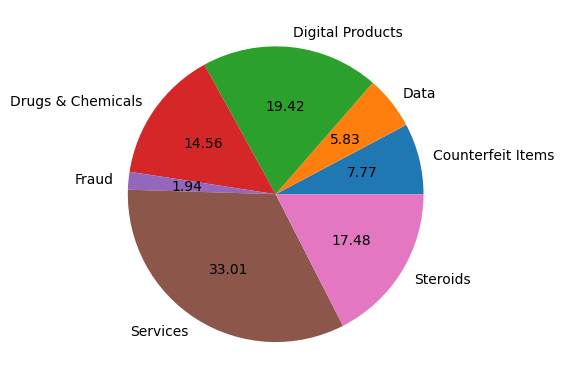

In [3]:
data.groupby('Market Category').size().plot(kind='pie', autopct='%.2f')
print(data['Market Category'].value_counts())


### Category Distribution

We have a high concentration of data points in the following categories: **Drugs & Chemicals, Steroids, Digital Products and Services**


Market Category
Counterfeit Items     8
Data                  6
Digital Products     20
Drugs & Chemicals    15
Fraud                 2
Services             34
Steroids             18
dtype: int64



<AxesSubplot: xlabel='Market Category'>

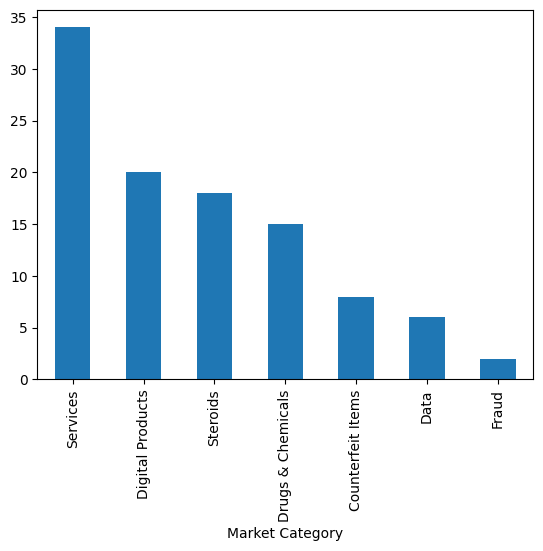

In [4]:
sr = data.groupby('Market Category').size()
print(sr)
sr.sort_values(ascending=False, inplace=True)
print()
sr.plot(kind='bar')

### Distribution of sales per seller

Below is an overview of the amount of sales we have per seller that we collected in the data

We have a total of 51 unique sellers in this dataset.


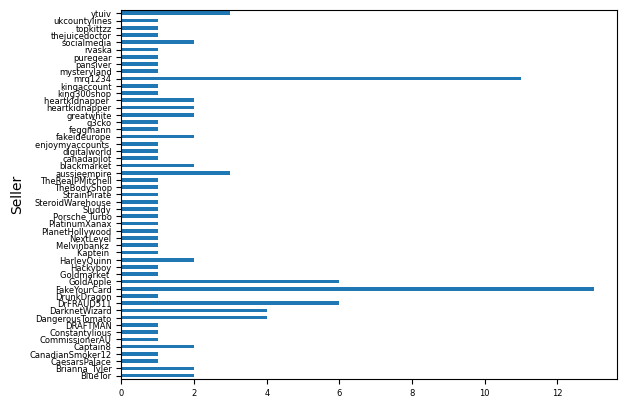

In [5]:
top_sellers = ['DangerousTomato', 'WeAreAMSTERDAM', 'expresspharma', 'heartkidnapper', 'RedLightLabs']


#Distinct Sellers

data.sort_values('Seller').groupby('Seller').size().plot(kind='barh', fontsize=6)

seller_count = len(data.groupby('Seller').size())

print(f"We have a total of {seller_count} unique sellers in this dataset.")





### Amount of sales per seller distribution

As we can see, most of our sellers have **2** items in the frequency distribution our dataset

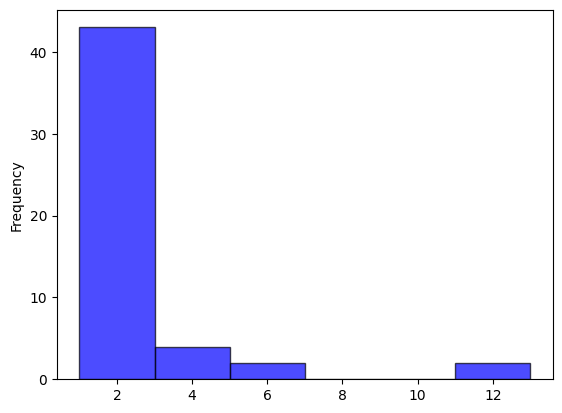

In [6]:
df = data.sort_values('Seller').groupby('Seller').size()

ax = df.plot.hist(bins=6, alpha=0.7, edgecolor="black", color="blue")


test
### Seller per Category

In [7]:

data['Market Category'] = data['Market Category'].str.strip()
for category in set(data['Market Category'].values):
    print(f'{category} :')
    print(data[(data['Market Category'] == category)].groupby('Seller').size())
#for seller in seller_list:
#    print(seller_list)
#sub_df = data[data['Market Category'].str.contains(seller_list)]
#print(sub_df.groupby('Seller').size())


Drugs & Chemicals :
Seller
CaesarsPalace       1
CommissionerAU      1
Constantylious      1
NextLevel           1
PlanetHollywood     1
PlatinumXanax       1
Sluddy              1
SteroidWarehouse    1
StrainPirate        1
TheRealPMitchell    1
greatwhite          2
mysteryland         1
puregear            1
ukcountylines       1
dtype: int64
Fraud :
Seller
CanadianSmoker12    1
mrq1234             1
dtype: int64
Counterfeit Items :
Seller
Brianna_Tyler     1
fakeideurope      2
feggmann          1
thejuicedoctor    1
ytuiv             3
dtype: int64
Services :
Seller
Brianna_Tyler       1
DRAFTMAN            1
DarknetWizard       4
DrFRAUD511          6
Goldmarket          1
Kaptein             1
Melvinbankz         1
Porsche Turbo       1
blackmarket         2
canadapilot         1
enjoymyaccounts     1
g3cko               1
heartkidnapper      2
heartkidnapper      1
kingaccount         1
mrq1234             7
socialmedia         2
dtype: int64
Data :
Seller
GoldApple    6
dtype:

### Seller Overview - Market Category: Counterfeit Items

Number of sales per seller in category: Counterfeit Items
Seller
Brianna_Tyler     1
fakeideurope      2
feggmann          1
thejuicedoctor    1
ytuiv             3
dtype: int64
Word fake - Occurances: 7
Word using - Occurances: 6
Word illegal. - Occurances: 4
Word item - Occurances: 3
Name Fake - Occurances: 3
Name License - Occurances: 2
Name Book - Occurances: 1
Name Safe - Occurances: 1
Name Storage - Occurances: 1


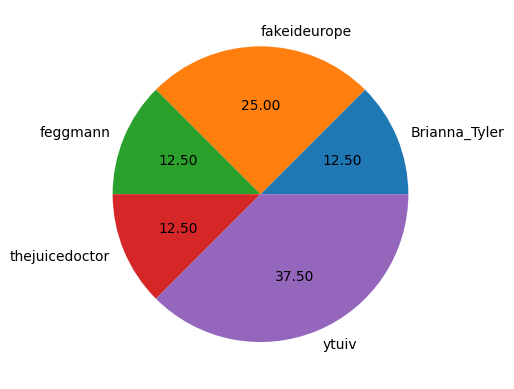

In [8]:
target = 'Counterfeit Items'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
print(f"Number of sales per seller in category: {target}")
print(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
for item in count:
    if len(item) > 3:
        print(f"Word {item} - Occurances: {count[item]}")
count = dict(Counter(" ".join(df['Name']).split()).most_common(5))
for item in count:
    if len(item) > 3:
        print(f"Name {item} - Occurances: {count[item]}")

### Seller Overview - Market Category: Steroids

Number of sales per seller in category: Steroids
Seller
FakeYourCard    13
TheBodyShop      1
aussieempire     3
king300shop      1
dtype: int64
Word prescription - Occurances: 9
Word with - Occurances: 9
Word only - Occurances: 6
Word used - Occurances: 5
Word illegal - Occurances: 4


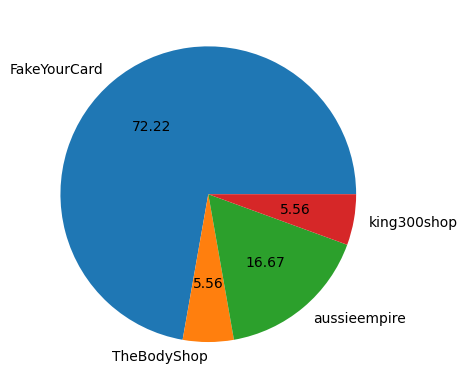

In [9]:
target = 'Steroids'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
print(f"Number of sales per seller in category: {target}")
print(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
for item in count:
    if len(item) > 3:
        print(f"Word {item} - Occurances: {count[item]}")

### Seller Overview - Market Category: Drugs & Chemicals



Number of sales per seller in category: Drugs & Chemicals


Seller
CaesarsPalace       1
CommissionerAU      1
Constantylious      1
NextLevel           1
PlanetHollywood     1
PlatinumXanax       1
Sluddy              1
SteroidWarehouse    1
StrainPirate        1
TheRealPMitchell    1
greatwhite          2
mysteryland         1
puregear            1
ukcountylines       1
dtype: int64

Word illegal - Occurances: 10
Word possession - Occurances: 6
Word selling - Occurances: 6


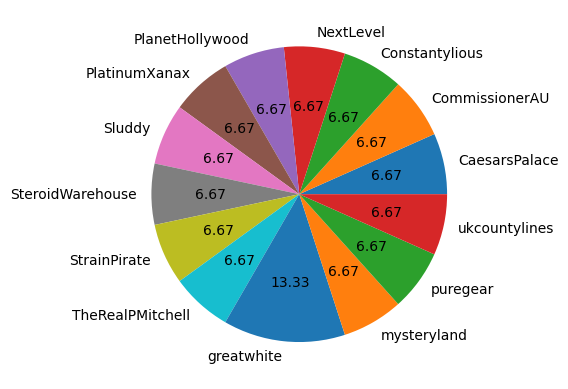

In [10]:
target = 'Drugs & Chemicals'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
print(f"Number of sales per seller in category: {target}")
display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
for item in count:
    if len(item) > 3:
        print(f"Word {item} - Occurances: {count[item]}")

### Seller Overview - Market Category: Digital Products

Number of sales per seller in category: Digital Products


Seller
BlueTor            2
Captain8           2
DangerousTomato    4
DrunkDragon        1
Hackyboy           1
HarleyQuinn        2
digitalworld       1
heartkidnapper     1
mrq1234            3
pansiver           1
rvaska             1
topkittzz          1
dtype: int64

Word illegal - Occurances: 11
Word could - Occurances: 7


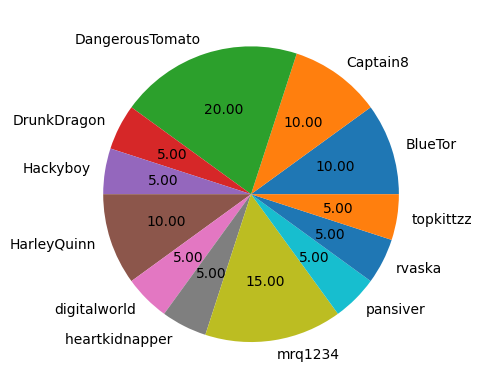

In [11]:
target = 'Digital Products'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
print(f"Number of sales per seller in category: {target}")
display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
for item in count:
    if len(item) > 3:
        print(f"Word {item} - Occurances: {count[item]}")

### Seller Overview - Market Category: Services

Number of sales per seller in category: Services


Seller
Brianna_Tyler       1
DRAFTMAN            1
DarknetWizard       4
DrFRAUD511          6
Goldmarket          1
Kaptein             1
Melvinbankz         1
Porsche Turbo       1
blackmarket         2
canadapilot         1
enjoymyaccounts     1
g3cko               1
heartkidnapper      2
heartkidnapper      1
kingaccount         1
mrq1234             7
socialmedia         2
dtype: int64

Word that - Occurances: 18


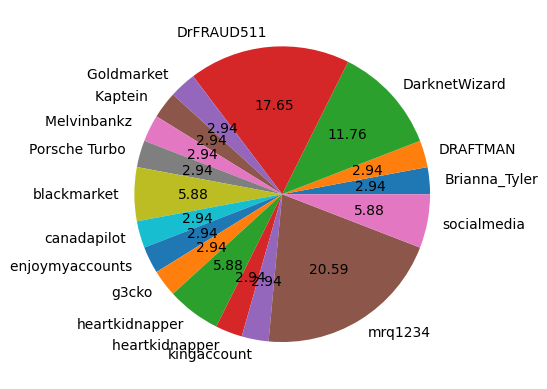

In [12]:
target = 'Services'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
print(f"Number of sales per seller in category: {target}")
display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
for item in count:
    if len(item) > 3:
        print(f"Word {item} - Occurances: {count[item]}")



### Seller Overview - Market Category: Data

Number of sales per seller in category: Data


Seller
GoldApple    6
dtype: int64

Word contains - Occurances: 4
Word This - Occurances: 3
Word personal - Occurances: 3
Word data - Occurances: 3
Word that - Occurances: 3
Word item - Occurances: 2
Word IDs, - Occurances: 2
Word Full - Occurances: 2
Word Names, - Occurances: 2


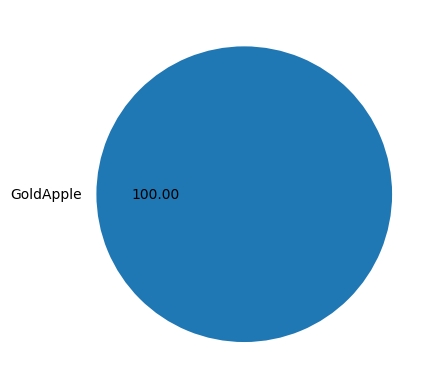

In [13]:
target = 'Data'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
print(f"Number of sales per seller in category: {target}")
display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
for item in count:
    if len(item) > 3:
        print(f"Word {item} - Occurances: {count[item]}")

### Seller Overview - Market Category: Fraud

Number of sales per seller in category: Fraud


Seller
CanadianSmoker12    1
mrq1234             1
dtype: int64

Word would - Occurances: 1
Word illegal - Occurances: 1
Word botnet - Occurances: 1
Word from - Occurances: 1
Word market - Occurances: 1


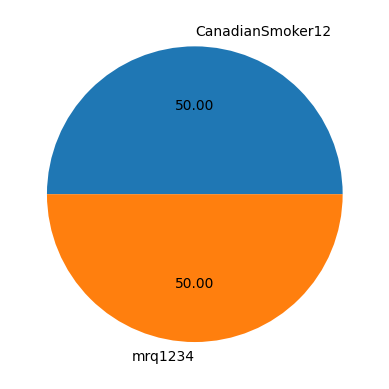

In [14]:
target = 'Fraud'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
print(f"Number of sales per seller in category: {target}")
display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
for item in count:
    if len(item) > 3:
        print(f"Word {item} - Occurances: {count[item]}")